# Small Business Marketing Promotions Analysis

Small business requires an analysis of their marketing promotion data to estimate sales. Each observation represents an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. 

To address their request, we will conduct multiple linear regression analysis to estimate sales from a combination of independent variables. The analysis will consist of:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

### Imports

In [ ]:
# Importing libraries and modules.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load Dataset

In [ ]:
# Loading the data.

data = pd.read_csv('~/Documents/data_science/projects/mul_lin_reg/marketing_sales_data.csv')

# Displaying the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


### Exploratory Data Analysis

In [ ]:
# Checking unique values for some of the features

print('TV unique values: ', data['TV'].unique())
print('Influencer unique values:', data['Influencer'].unique())

TV unique values:  ['Low' 'High' 'Medium']
Influencer unique values: ['Micro' 'Mega' 'Nano' 'Macro']


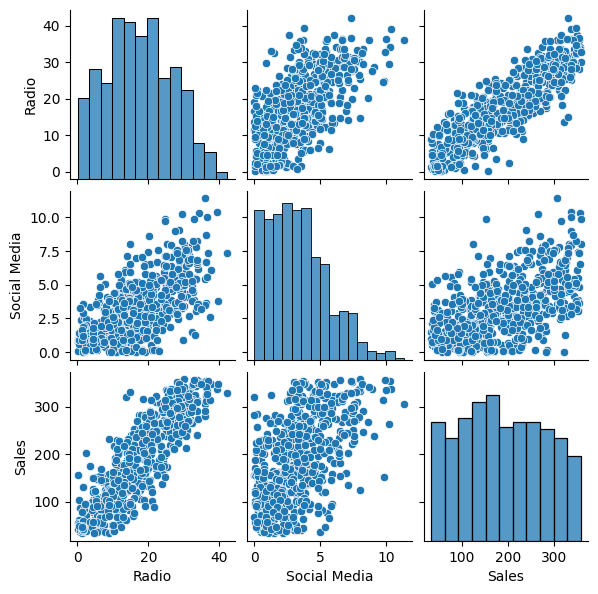

In [ ]:
# Creating pairplot of the data

sns.pairplot(data, height=2);

After performing EDA we identified the features in the data as:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

Additionally, we can see that `Radio` and `Social Media` both appear to have linear relationships with `Sales`. Given this, `Radio` and `Social Media` may be useful as independent variables in a multiple linear regression model estimating `Sales`. 

`TV` and `Influencer` are excluded from the pairplot because they are not numeric features. 

To characterize the relationship between the categorical variables and `Sales`, we find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [ ]:
# Calculating the mean sales for each TV category. 

print(data.groupby('TV')['Sales'].mean())

print('')

# Calculating the mean sales for each Influencer category .

print(data.groupby('Influencer')['Sales'].mean())


TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


The average `Sales` for `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`.

The categories for `Influencer` have different average `Sales`, but the variation is not substantial. `Influencer` may be a weak predictor of `Sales`.

These results can be investigated further when fitting the multiple linear regression model. 

In [ ]:
# Checking and dropping rows that contain missing data

data = data.dropna(axis=0)

In [ ]:
# Renaming all columns in data that contain a space so the OLS model can run properly. 

data = data.rename(columns={'Social Media': 'Social_Media'})

### Build Multiple Linear Regression model that predicts Sales

In [ ]:
# Defining the OLS formula.

ols_formula = 'Sales ~ C(TV) + Radio'

# Creating an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fitting the model.

model = OLS.fit()

# Saving the results summary.

model_results = model.summary()

# Displaying the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          1.63e-288
Time:                        17:43:13   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* `TV` was selected, as the preceding analysis showed a strong relationship between the `TV` promotional budget and the average `Sales`.
* `Radio` was selected because the pairplot showed a strong linear relationship between `Radio` and `Sales`.
* `Social Media` was not selected because it did not increase model performance and it was later determined to be correlated with another independent variable: `Radio`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the preceding analysis.

### Check model assumptions

#### Model Assumption: Linearity

We create scatterplots comparing the continuous independent variables selected previously with `Sales` to check the linearity assumption. We use the pairplot created earlier to verify the linearity assumption and/or create new scatterplots comparing the variables of interest.

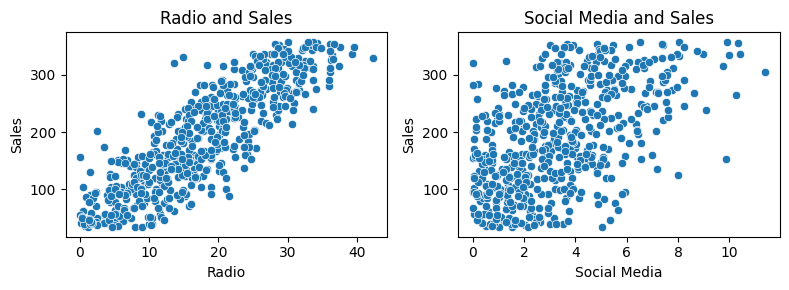

In [29]:
# Creating a scatterplot for each independent variable and the dependent variable.

# Creating a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,3))

# Creating a scatterplot between Radio and Sales.
sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])

# Setting the title of the first plot.
axes[0].set_title("Radio and Sales")

# Creating a scatterplot between Social Media and Sales.
sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])

# Setting the title of the second plot.
axes[1].set_title("Social Media and Sales")

# Setting the xlabel of the second plot.
axes[1].set_xlabel("Social Media")

# Using matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

The linearity assumption holds for `Radio`, as there is a clear linear relationship in the scatterplot between `Radio` and `Sales`. `Social Media` was not included in the preceding multiple linear regression model, but it does appear to have a linear relationship with `Sales`.

#### Model Assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

#### Model Assumption: Normality

We will create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

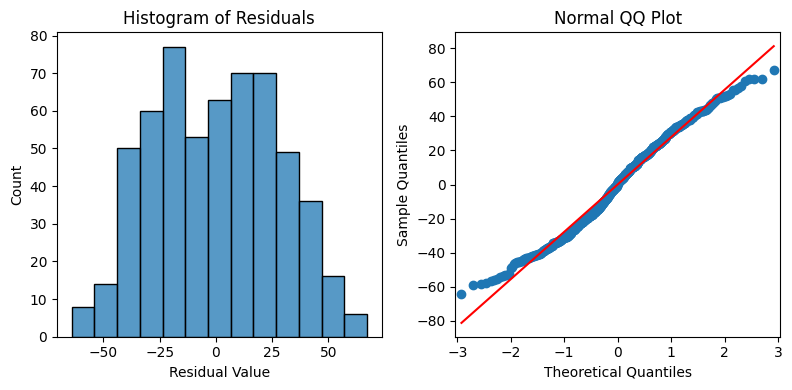

In [30]:
# Calculating the residuals.

residuals = model.resid

# Creating a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Creating a histogram with the residuals. 

sns.histplot(residuals, ax=axes[0])

# Setting the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Setting the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Creating a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Setting the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Using matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Showing the plot.
plt.show()

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

#### Model Assumption: Constant variance

We check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Adding a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

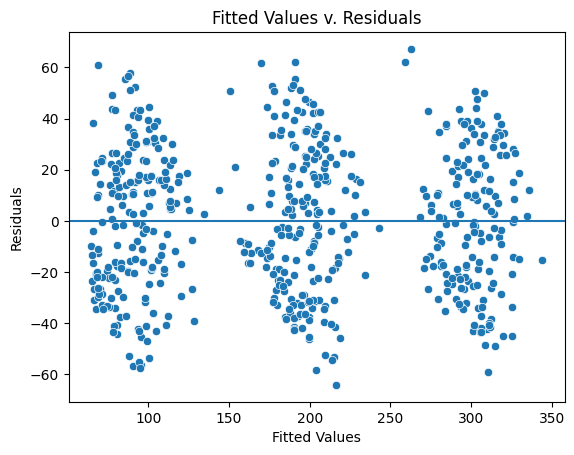

In [31]:
# Creating a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Setting the x axis label.
fig.set_xlabel("Fitted Values")

# Setting the y axis label.
fig.set_ylabel("Residuals")

# Setting the title.
fig.set_title("Fitted Values v. Residuals")

# Adding a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Showing the plot.
plt.show()

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

#### Model Assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Plot scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

We will check our model's no multicollinearity assumption using one of these two methods.

In [32]:
# Calculate the variance inflation factor (optional).

# Importing variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]

# Calculating the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Creating a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Displaying the VIF results.
df_vif

,VIF
Radio,5.170922
Social_Media,5.170922


The preceding model only has one continous independent variable, meaning there are no multicollinearity issues. 

If a model used both `Radio` and `Social_Media` as predictors, there would be a moderate linear relationship between `Radio` and `Social_Media` that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both `Radio` and `Social_Media` are included in the model is 5.17 for each variable, indicating high multicollinearity.

### Evaluating the results

#### OLS Regression Results

In [33]:
# Displaying the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          1.63e-288
Time:                        17:43:13   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with $R^{2} = 0.904$. In other words, the model explains $90.4\%$ of the variation in `Sales`. This makes the model an excellent predictor of `Sales`. 

#### Interpreting the Model Coefficients

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$

The relationship between `Sales` and the independent variables can be represented by the below linear equations: 

$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$

The default `TV` category for the model is `High` since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` or `Low` `TV` categories compared to the `High` `TV` category when `Radio` is at the same level.

For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average compared to a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

The Beta coefficients allow us to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

Potential areas to explore in the future include:

* Providing the business with the estimated sales given different TV promotions and radio budgets
* Additional plots to help convey the results, such as using the `seaborn` `regplot()` to plot the data with a best fit regression line

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 